## 3D Beamforming Application

this is an app-like jupyter notebook. 


In [63]:
# import the PCD file and recording data
import open3d as o3d
import os
import glob
from data_importer import PointCloudManager, DataExtractor

"""
This block processes point cloud data and extracts audio recording data.

Returns:
- pcd_mic (open3d.geometry.PointCloud): Point cloud data from microphone.
- pcd (open3d.geometry.PointCloud): Point cloud data.
- filtered_pcd (open3d.geometry.PointCloud): Filtered point cloud data.
- recording (numpy.ndarray): Audio recording data.
"""

base_folder = "postPCD"  # dir to PCD folders
manager = PointCloudManager(base_folder)
pcd_mic, pcd, cpcd = manager.run()

extractor = DataExtractor('HP-side-vvs-0.6m.mat')
recording = extractor.load_data()

Available subfolders:
0: AP-align_20231216_122743
1: AP-modify_20231208_161053
2: AP-noy-187_20231208_162247
3: AP-noy_20231208_161813
4: AP-side-0.7m-highRes_20231208_154153
5: HP-hr-0.4m-rc_20231211_150219
6: HP-rc-side_20231211_151710
7: HP-side~0.4m-hr_20231211_143359
8: HP-vvs-0.7_20231216_132553
9: HP-vvs_20231227_142812
10: test-_20231227_135151
11: vvs-20kHz-12.8k-rightEar-realigned_20231120_163043


In [30]:
%load_ext autoreload
%aimport SoundFieldAnalysis
%autoreload 1
%aimport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
SoundFieldAnalysis

Modules to skip:



In [4]:
import ipywidgets as widgets
from IPython.display import display

# create a checkbox
checkbox = widgets.Checkbox(
    value=False,
    description='chooese if you want to recalculate the results',
    disabled=False,
    indent=False
)

# display the checkbox
display(checkbox)

# use a function to print the checkbox's value
def on_checkbox_change(change):
    if change['new']:  # while the checkbox is checked
        print("recalculate the results")
    else:
        print("Checkbox is False")

# get the checkbox's current value
checkbox.observe(on_checkbox_change, names='value')

Checkbox(value=False, description='chooese if you want to recalculate the results', indent=False)

recalculate the results


In [140]:
from SoundFieldAnalysis import SoundFieldAnalysis

freq = 1500
mode = 'MUSIC1'
# initialize the variables
BF_analysis = SoundFieldAnalysis(pcd_mic, recording, cpcd, freq=freq)
BF_analysis.calculate_sparse()
BF_analysis.calculate_csm()
# inorder to avoid re-calculation of the same thing
if checkbox.value or 'result' not in globals() or freq != globals()['freq_s'] or mode != globals()['mode_s']:
    result = BF_analysis.gen_result(mode)
    freq_s = freq
    mode_s = mode

print('the calculated frequency is: ', BF_analysis.f[BF_analysis.index])

the calculated frequency is:  1495.04


In [142]:
# plot the result
plotter, p_range = BF_analysis.plot(result, dynamic_range=10, max_crop=0,  plot_mesh = True, opacity=None)
# plotter.add_title(f"Beamforming result at {freq} Hz")
plotter.show()

Widget(value="<iframe src='http://localhost:65350/index.html?ui=P_0x20d9bf62b30_48&reconnect=auto' style='widt…

In [125]:

plotter_add_slice, cloud = BF_analysis.add_slicer(plotter, mode, p_range = None, plane='xy', 
                                           center = [0,0],position=0.25, 
                                           size=[1, 3], plot_mesh=False,
                                           dynamic_range=80, density=500)


In [127]:
import pyvista as pv
plotter_plane = pv.Plotter()
plotter_plane.add_mesh(cloud, cmap='rainbow', scalars='Sound Pressure(dB)',show_scalar_bar = True, point_size = 6)
plotter_plane.show()

Task exception was never retrieved
future: <Task finished name='Task-849' coro=<WebSocketWriter.ping() done, defined at c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py:705> exception=ConnectionResetError('Cannot write to closing transport')>
Traceback (most recent call last):
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\asyncio\tasks.py", line 232, in __step
    result = coro.send(None)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 709, in ping
    await self._send_frame(message, WSMsgType.PING)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 686, in _send_frame
    self._write(header + message)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 696, in _write
    raise ConnectionResetError("Cannot write to closing transport"

Widget(value="<iframe src='http://localhost:65350/index.html?ui=P_0x20dd0397010_39&reconnect=auto' style='widt…

Exception raised
ConnectionResetError('Cannot write to closing transport')
Traceback (most recent call last):
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\wslink\protocol.py", line 340, in onMessage
    await self.sendWrappedMessage(
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\wslink\protocol.py", line 484, in sendWrappedMessage
    await ws.send_str(encMsg)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\web_ws.py", line 336, in send_str
    await self._writer.send(data, binary=False, compress=compress)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 723, in send
    await self._send_frame(message, WSMsgType.TEXT, compress)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 686, in _send_frame
    self._write(header + message)
  File "c:\Users\ZHLI\Ap

 JS Error => Malformed message:  {"wslink": "1.0", "id": "publish:trame.vtk.delta:0", "result": {"parent": "0x0", "id": 40, "type": "vtkWin32OpenGLRenderWindow", "properties": {"numberOfLayers": 2}, "dependencies": [{"parent": "0000020e4ddf1000", "id": "0000020eeccab350", "type": "vtkOpenGLRenderer", "properties": {"background": [1.0, 1.0, 1.0], "background2": [0.2, 0.2, 0.2], "viewport": [0.0, 0.0, 1.0, 1.0], "twoSidedLighting": 1, "lightFollowCamera": 1, "layer": 0, "preserveColorBuffer": 0, "preserveDepthBuffer": 0, "nearClippingPlaneTolerance": 0.001, "clippingRangeExpansion": 0.5, "useShadows": 0, "useDepthPeeling": 0, "occlusionRatio": 0.0, "maximumNumberOfPeels": 4, "interactive": 1}, "dependencies": [{"parent": "0000020eeccab350", "id": "0000020e6b514e60", "type": "vtkOpenGLCamera", "properties": {"focalPoint": [0.0, 0.0, 0.25], "position": [3.5270624262355965, 3.5270624262355965, 3.7770624262355965], "viewUp": [0.0, 0.0, 1.0], "clippingRange": [3.7501067390954264, 9.0932119422

In [132]:

plotter_add_slice, cloud = BF_analysis.add_slicer(plotter, mode, p_range = None, plane='yz', 
                                           center = [0,0.2],position=0.2, 
                                           size=[1, 1], plot_mesh=False,
                                           dynamic_range=80, density=500)

Task exception was never retrieved
future: <Task finished name='Task-1086' coro=<WslinkHandler.sendWrappedMessage() done, defined at c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\wslink\protocol.py:423> exception=ConnectionResetError('Cannot write to closing transport')>
Traceback (most recent call last):
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\asyncio\tasks.py", line 232, in __step
    result = coro.send(None)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\wslink\protocol.py", line 484, in sendWrappedMessage
    await ws.send_str(encMsg)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\web_ws.py", line 336, in send_str
    await self._writer.send(data, binary=False, compress=compress)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 723, in send
    await self._send_frame(message, WSMsgType.TEXT, com

In [133]:

plotter_plane = pv.Plotter()
plotter_plane.add_mesh(cloud, cmap='rainbow', scalars='Sound Pressure(dB)',show_scalar_bar = True, point_size = 6)
plotter_plane.show()

Task exception was never retrieved
future: <Task finished name='Task-1103' coro=<WebSocketWriter.ping() done, defined at c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py:705> exception=ConnectionResetError('Cannot write to closing transport')>
Traceback (most recent call last):
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\asyncio\tasks.py", line 232, in __step
    result = coro.send(None)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 709, in ping
    await self._send_frame(message, WSMsgType.PING)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 686, in _send_frame
    self._write(header + message)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 696, in _write
    raise ConnectionResetError("Cannot write to closing transport

Widget(value="<iframe src='http://localhost:65350/index.html?ui=P_0x20d9c048220_42&reconnect=auto' style='widt…

In [116]:
# run this cell to crop the models
import pcd_aligner
# modify the model
cpcd_path = f"{manager.directory}/model_2.ply"
mic_path = f"{manager.directory}/model_0.ply"
processor = pcd_aligner.PointCloud_PreProcessor(cpcd_path)
cpcd = processor.pcd_crop(pcd = cpcd, save = True)

For point selecting
1) Please pick points using [shift + left click]
   Press [shift + right click] to undo point picking
2) After picking points, press 'Q' to close the window
For crop the model
Press Y to switch to the ortho view, 
 K to lock the view and pick cropping area 
 C to crop 
 F to free view

 After picking points, press Q to quit, cropped model will be saved in variable "pcd"
[Open3D INFO] Picked point #34968 (0.091, 0.023, 0.28) to add in queue.
[Open3D INFO] Picked point #51609 (0.047, 0.021, 0.23) to add in queue.
[Open3D INFO] Picked point #32940 (0.089, 0.018, 0.25) to add in queue.
[Open3D INFO] Picked point #19669 (0.11, 0.0084, 0.22) to add in queue.
[Open3D INFO] Picked point #46206 (0.14, -0.016, 0.15) to add in queue.
[Open3D INFO] Picked point #38529 (0.14, -0.06, 0.28) to add in queue.
[Open3D INFO] Picked point #25001 (0.1, 0.045, 0.093) to add in queue.
[Open3D INFO] Picked point #57534 (0.024, 0.046, 0.064) to add in queue.


In [117]:
import numpy as np

freq_list = BF_analysis.calculate_sparse(freq_range=[10, 8000])

points_np = np.asarray(cpcd.points)
picked_points_index = processor.vis.get_picked_points()
picked_points = points_np[picked_points_index]
single_point_pcd = o3d.geometry.PointCloud()

# store the picked points in a point cloud
single_point_pcd.points = o3d.utility.Vector3dVector(picked_points)

result_muti_MUSIC = []
result_muti_DAS = []

result = []
for freq in freq_list:
    # set the current frequency
    BF_analysis.freq = freq
    mode = 'MUSIC1'
    # initialize the variables
    BF_analysis.mic_pcd = pcd_mic
    BF_analysis.sound_field = recording
    BF_analysis.pcd = single_point_pcd
    BF_analysis.points = np.array(single_point_pcd.points)

    BF_analysis.calculate_csm()
    result = BF_analysis.gen_result(mode)
    result_muti_MUSIC.append(result)

result = []
for freq in freq_list:
    # set the current frequency
    BF_analysis.freq = freq
    mode = 'DAS-Non-splice'

    BF_analysis.calculate_csm()
    result = BF_analysis.gen_result(mode)
    result_muti_DAS.append(result)


C:\Users\ZHLI\AppData\Local\Temp\ipykernel_22576\2151152436.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(freq_range)
C:\Users\ZHLI\AppData\Local\Temp\ipykernel_22576\2151152436.py:18: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,8000])


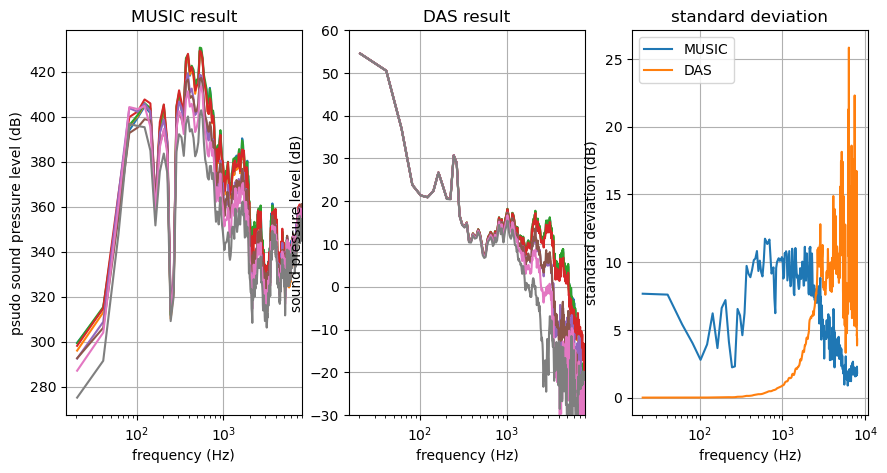

In [119]:
import matplotlib.pyplot as plt

freq_range = [0, 8000]
plt.figure(figsize=(14, 5))
plt.subplot(1, 4, 1)
plt.title('MUSIC result')
plt.ylabel('psudo sound pressure level (dB)')
plt.xlabel('frequency (Hz)')
plt.semilogx(freq_list, result_muti_MUSIC)
plt.xlim(freq_range)
plt.grid()

plt.subplot(1, 4, 2)
plt.title('DAS result')
plt.ylabel('sound pressure level (dB)')
plt.xlabel('frequency (Hz)')
plt.semilogx(freq_list, result_muti_DAS)
plt.xlim([0,8000])
plt.ylim([-30, 60])

plt.grid()

plt.subplot(1, 4, 3)
plt.semilogx(freq_list, np.std(result_muti_MUSIC, axis=1))
plt.semilogx(freq_list, np.std(result_muti_DAS, axis=1))
plt.title('standard deviation')
plt.ylabel('standard deviation (dB)')
plt.xlabel('frequency (Hz)')
plt.legend(['MUSIC', 'DAS'])
plt.grid()


In [89]:
# write the modification of model to the file
o3d.io.write_point_cloud(cpcd_path, cpcd)
o3d.io.write_point_cloud(mic_path, pcd_mic)

True

In [7]:
# align the pcd coordinates
cpcd, picked_points = processor.coordinates_align()

origin = processor.apply_rotation(pcd_mic, picked_points)
# apply translation
pcd_mic = processor.apply_translation(pcd_mic, origin)

For point selecting
1) Please pick points using [shift + left click]
   Press [shift + right click] to undo point picking
2) After picking points, press 'Q' to close the window
For crop the model
Press Y to switch to the ortho view, 
 K to lock the view and pick cropping area 
 C to crop 
 F to free view

 After picking points, press Q to quit, cropped model will be saved in variable "pcd"

Picked points: []
need 3 points to align


IndexError: list index out of range

In [90]:
o3d.visualization.draw_geometries([cpcd, processor.mesh_frame, pcd_mic])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [98]:
processor.pcd_crop()

Task exception was never retrieved
future: <Task finished name='Task-1566' coro=<WebSocketWriter.ping() done, defined at c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py:705> exception=ConnectionResetError('Cannot write to closing transport')>
Traceback (most recent call last):
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\asyncio\tasks.py", line 232, in __step
    result = coro.send(None)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 709, in ping
    await self._send_frame(message, WSMsgType.PING)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 686, in _send_frame
    self._write(header + message)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 696, in _write
    raise ConnectionResetError("Cannot write to closing transport

NameError: name 'processor' is not defined

In [46]:
plotter_add_slice.show()

A view with name (P_0x1c5a4e4a020_22) is already registered
 => returning previous one


Widget(value="<iframe src='http://localhost:53282/index.html?ui=P_0x1c5a4e4a020_22&reconnect=auto' style='widt…

TypeError: object of type 'int' has no len()

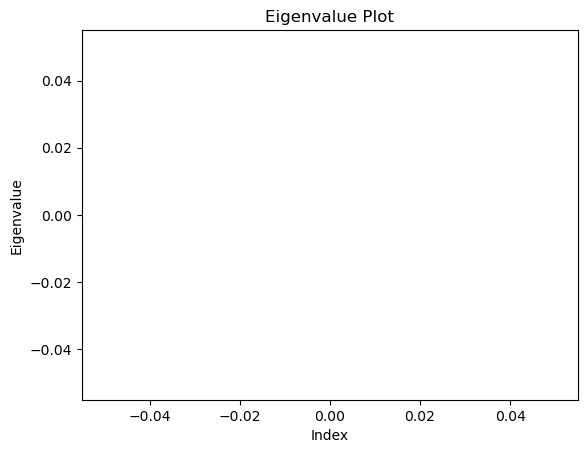

In [60]:
import matplotlib.pyplot as plt

eigenval = BF_analysis.eigVal
plt.plot(eigenval)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalue Plot')
plt.xticks(range(len(eigenval)), range(len(eigenval)))
plt.show()

